# MOVIE GENRE CLASSIFICATION

**Create a machine learning model that can predict the genre of a
movie based on its plot summary or other textual information. You
can use techniques like TF-IDF or word embeddings**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/description.txt
/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/test_data_solution.txt
/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/test_data.txt
/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/train_data.txt


In [2]:
train_data = pd.read_csv("/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/train_data.txt", sep=':::', names=['Title', 'Genre', 'Description'], engine='python')

In [3]:
train_data.head(2)

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...


In [4]:
train_data['Genre'].value_counts()

 drama           13613
 documentary     13096
 comedy           7447
 short            5073
 horror           2204
 thriller         1591
 action           1315
 western          1032
 reality-tv        884
 family            784
 adventure         775
 music             731
 romance           672
 sci-fi            647
 adult             590
 crime             505
 animation         498
 sport             432
 talk-show         391
 fantasy           323
 mystery           319
 musical           277
 biography         265
 history           243
 game-show         194
 news              181
 war               132
Name: Genre, dtype: int64

In [5]:
test_data = pd.read_csv("/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/test_data.txt", sep=':::', names=['Title', 'Description'], engine='python')

In [6]:
test_data.head(3)

,Title,Description
1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
3,Off the Beaten Track (2010),One year in the life of Albin and his family ...


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


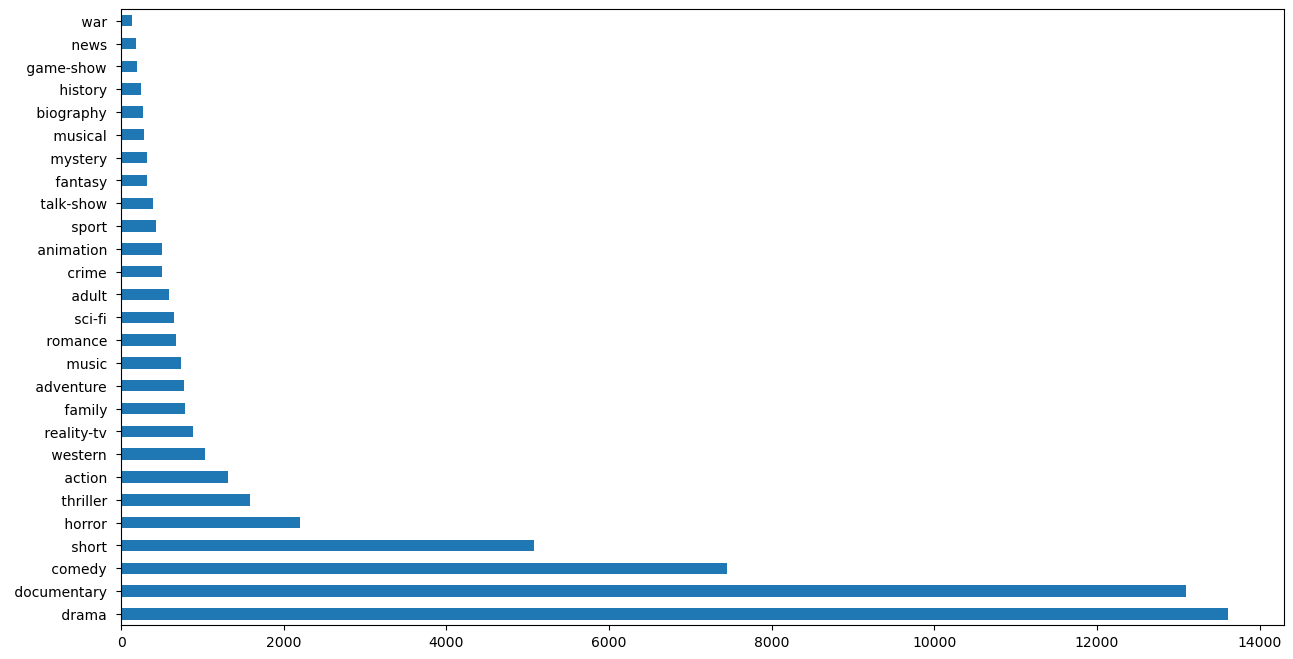

In [8]:
plt.figure(figsize=(15,8))
train_data['Genre'].value_counts().plot.barh()
plt.show()

In [9]:
train_data['length']=train_data['Description'].apply(lambda x:len(x))   # calculating length of description for each row
train_data.head(2)

,Title,Genre,Description,length
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,546
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,184


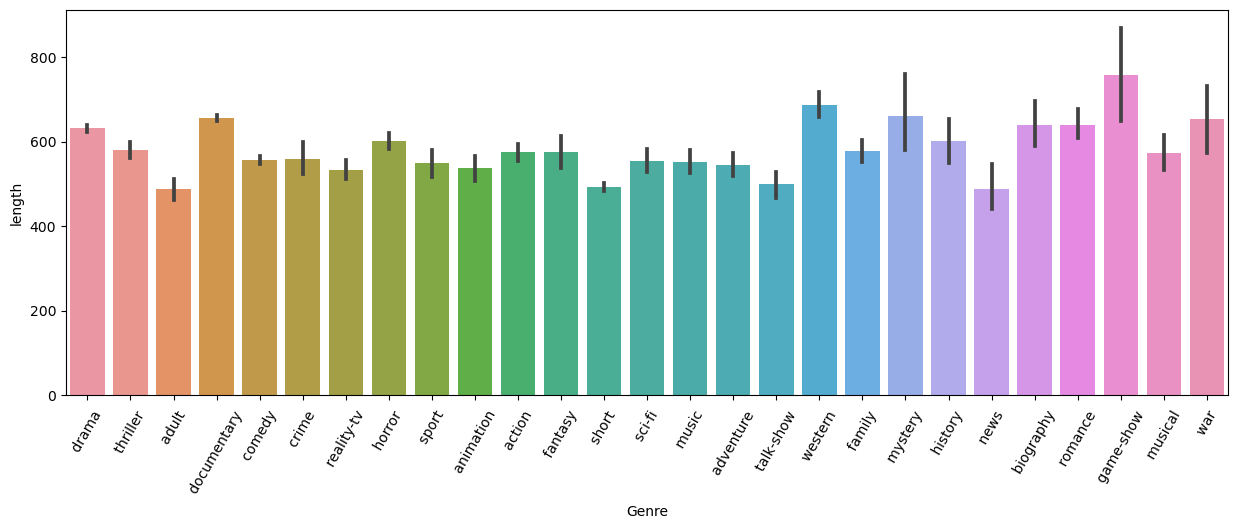

In [10]:
plt.figure(figsize=(15,5))
sns.barplot(x='Genre',y='length',data=train_data)   # average length and its deviation for all classes
plt.xticks(rotation=60)
plt.show()

In [11]:
train_data["clean_text"] = train_data["Description"].apply(lambda x: x.lower())

In [12]:
def remove_punct(text):
    """
        Remove the punctuation
    """
#     return re.sub(r'[]!"$%&\'()*+,./:;=#@?[\\^_`{|}~-]+', "", text)
    return text.translate(str.maketrans('', '', string.punctuation))

In [13]:
#train_data["clean_text"] = train_data["clean_text"].apply(lambda x: remove_punct(x))

In [14]:
#remove numeric from new_text column
def remove_numeric(column,df):
    df[column] = df[column].str.replace('\d+', '')
    return df

In [15]:
train_data = remove_numeric('clean_text',train_data)

/tmp/ipykernel_32/3156796766.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df[column] = df[column].str.replace('\d+', '')


In [16]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from gensim.models import Word2Vec

In [17]:
train_data['clean_text'] = train_data['clean_text'].apply(lambda text: word_tokenize(str(text)))

In [18]:
import nltk
from nltk.corpus import stopwords

In [19]:
# Removing stopwords.
nltk.download("stopwords")
from nltk.corpus import stopwords

stop = set(stopwords.words('english'))
train_data['clean_text'] = train_data['clean_text'].apply(lambda x: [word for word in x if word not in stop])

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
from nltk.stem import PorterStemmer

def porter_stemmer(text):
    """
        Stem words in list of tokenized words with PorterStemmer
    """
    stemmer = nltk.PorterStemmer()
    stems = [stemmer.stem(i) for i in text]
    return stems

In [21]:
train_data['clean_text'] = train_data['clean_text'].apply(lambda x: porter_stemmer(x))
train_data.head(3)

,Title,Genre,Description,length,clean_text
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,546,"[listen, convers, doctor, parent, ,, -year-old..."
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,184,"[brother, sister, past, incestu, relationship,..."
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,650,"[bu, empti, student, field, trip, museum, natu..."


In [22]:
train_data['clean_text'] = train_data['clean_text'].apply(lambda tokens: ' '.join(tokens))

In [23]:
train_data.head(3)

,Title,Genre,Description,length,clean_text
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,546,"listen convers doctor parent , -year-old oscar..."
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,184,brother sister past incestu relationship curre...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,650,bu empti student field trip museum natur histo...


In [24]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, SpatialDropout1D
from tensorflow.keras.callbacks import EarlyStopping

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud

# Tfidf Vectorization

In [28]:
num_words = 50000
max_len = 250
tokenizer = Tokenizer(num_words=num_words, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(train_data['clean_text'].values)

In [29]:
tfidv = TfidfVectorizer(max_features=3000)

In [30]:
X = tfidv.fit_transform(train_data["clean_text"]).toarray()
X = pad_sequences(X, maxlen=max_len)

In [31]:
y = train_data["Genre"].values

In [32]:
y = pd.get_dummies(train_data['Genre']).values

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

# LSTM model

In [39]:
num_words = 50000
max_len = 250
tokenizer = Tokenizer(num_words=num_words, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(train_data['clean_text'].values)

In [40]:
EMBEDDING_DIM = 100
model = Sequential()
model.add(Embedding(num_words, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.1, recurrent_dropout=0.2))
model.add(Dense(27, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [41]:
call_backs  = [EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=2,
                              mode='auto')]
history = model.fit(X, y, epochs=5, batch_size=32,validation_data=(X_test,y_test), callbacks=call_backs)

Epoch 1/5
1695/1695 [==============================] - 609s 357ms/step - loss: 2.3554 - accuracy: 0.2474 - val_loss: 2.3631 - val_accuracy: 0.2412
Epoch 2/5
1695/1695 [==============================] - 600s 354ms/step - loss: 2.3465 - accuracy: 0.2465 - val_loss: 2.3653 - val_accuracy: 0.2412
Epoch 3/5
1695/1695 [==============================] - 599s 353ms/step - loss: 2.3458 - accuracy: 0.2480 - val_loss: 2.3613 - val_accuracy: 0.2412
Epoch 4/5
1695/1695 [==============================] - 599s 353ms/step - loss: 2.3452 - accuracy: 0.2456 - val_loss: 2.3600 - val_accuracy: 0.2412
Epoch 5/5
1695/1695 [==============================] - 597s 352ms/step - loss: 2.3444 - accuracy: 0.2462 - val_loss: 2.3617 - val_accuracy: 0.2478


In [42]:
results = model.evaluate(X, y, verbose=0)
print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

    Test Loss: 2.34222
Test Accuracy: 25.11%


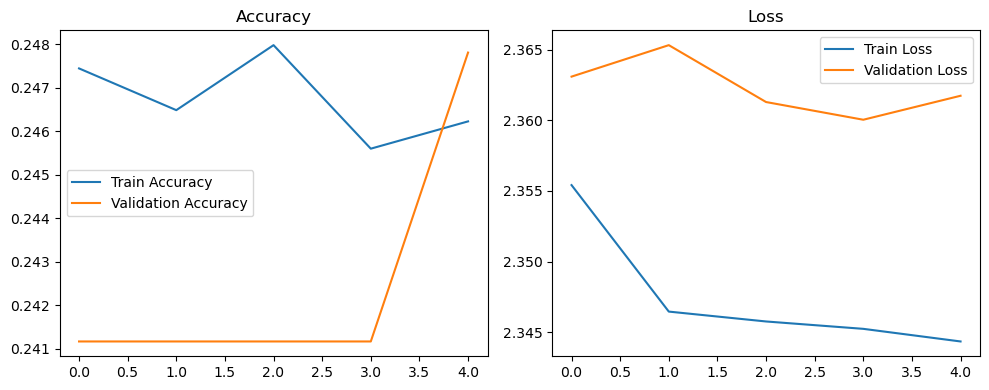

In [43]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.tight_layout()
plt.show()